# Homework 5

Raphaël Attali, Camille Morand-Duval, Niels Nicolas, Debdeep Roy

# Multivariate GARCH models, dynamic conditional correlations during ﬁnancial turmoil


We would like estimate a multivariate volatility model for three stocks or indices of your interest and for which you anticipate that their pairwise correlations have jumped up during the recent ﬁnancial turmoil. You can pick for example stocks from diﬀerent sectors of the S&P500 index. For each asset, download daily adjusted closing prices and transform them in percentage returns.


In [1]:
import pandas as pd
import csv
import re
import numpy as np

import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf

## Extract stock values

#### Comment
We chose companies which have likely benefited from the current events:
* Regeneron Pharmaceuticals Inc. (REGN) - steps towards developing an antibody treatment for the virus
* West Pharmaceutical Services Inc. (WST) - technology for drug delivery
* ServiceNow Inc. (NOW) - workflow apps, useful when working from home

In [2]:
import pandas_datareader as web

def stock_returns(list): 
    
    start = datetime.datetime(2018, 5, 31)
    end = datetime.datetime(2020, 6, 26)
    array = []
    
    for tick in list: 
        stocks = web.DataReader(tick, 'yahoo', start, end)
        
        # log returns
        log_stock = np.log(stocks['Adj Close']) 
        log_returns = np.diff(log_stock)*100

        array.append(log_returns)
    
    array.append(stocks.reset_index()['Date'][1:])
    array = np.transpose(array)
    stocks = pd.DataFrame(array)
    
    return stocks

C:\Users\Camille\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
stocks = stock_returns(['regn', 'wst', 'now'])
stocks = stocks.rename(columns = {0: 'regn', 1: 'wst', 2: 'now', 3: 'date'})
stocks = stocks.set_index('date')
stocks = stocks.astype(float)
stocks.head()

,regn,wst,now
date,,,
2018-06-01,2.160821,0.000000,2.172058
2018-06-04,1.683479,2.453524,1.090395
2018-06-05,-0.076927,-0.294207,1.401574
2018-06-06,1.046295,1.358715,0.177177
2018-06-07,-2.055055,-1.075008,-4.931332


In [4]:
# remove NA values
stocks.isna().sum()

regn    0
wst     0
now     0
dtype: int64

## Question 1
 Make a time series plots of your returns and compute basic descriptive statistics. Compute the unconditional correlation matrix.

### Descriptive statistics

In [8]:
stocks.describe()

,regn,wst,now
count,522.000000,522.000000,522.000000
mean,0.134400,0.168475,0.156007
std,2.280171,1.958910,2.797721
min,-11.081256,-11.321640,-10.324860
25%,-1.088433,-0.688648,-1.229565
50%,0.109530,0.155609,0.245287
75%,1.245988,0.946942,1.509288
max,10.918916,10.631303,12.586031


In [9]:
skewness = stocks.skew()
kurtosis = stocks.kurt()

print('skewness:')
print(skewness)
print(' ')
print('kurtosis:')
print(kurtosis)

skewness:
regn    0.124531
wst     0.542979
now     0.168647
dtype: float64
 
kurtosis:
regn    2.890265
wst     7.223591
now     2.332935
dtype: float64


Text(0.5, 1.0, 'WST')

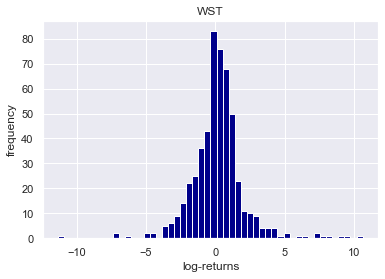

In [13]:
plt.hist(stocks['wst'], bins = 50, color = 'darkblue')
plt.xlabel('log-returns')
plt.ylabel('frequency')
plt.title('WST')

#### Comment
The mean of the log-returns is quite similar over the given period, the standard deviations differ however. The variance of the ServiceNow stock is greater than the ones of both parmaceutical companies, especially West Pharmaceutical Services. The distribution of the log-returns of West Pharmaceutical are dissimilar from the other two companies. Te spread is larger, so are the skewness and kurtosis. This is further conveyed in the histogram. 

### Time series

Text(0.5, 1.0, 'Regeneron Pharmaceutical')

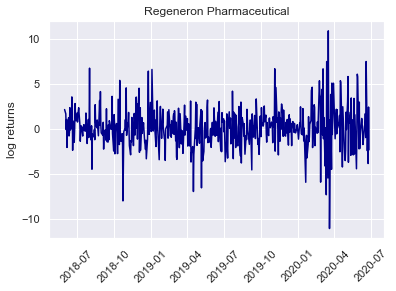

In [5]:
plt.plot(stocks['regn'], color = 'darkblue')
#plt.xlabel('date')
plt.xticks(rotation = 45)
plt.ylabel('log returns')
plt.title('Regeneron Pharmaceutical')

Text(0.5, 1.0, 'West Pharmaceutical')

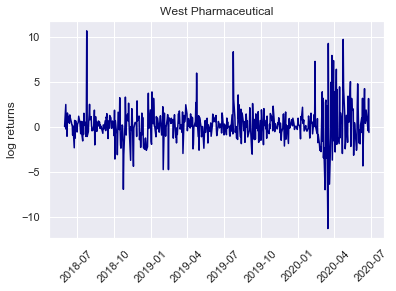

In [6]:
plt.plot(stocks['wst'], color = 'darkblue')
plt.xticks(rotation = 45)
plt.ylabel('log returns')
plt.title('West Pharmaceutical')

Text(0.5, 1.0, 'ServiceNow')

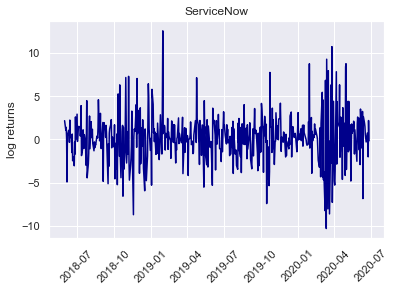

In [7]:
plt.plot(stocks['now'], color = 'darkblue')
plt.xticks(rotation = 45)
plt.ylabel('log returns')
plt.title('ServiceNow')

#### Comment
The three companies seem to observe similar time series trends in the recent period (from March 2020 i.e. the beginning of the COVID crisis in Europe and US). The variability of the log returns is large on a daily basis. 

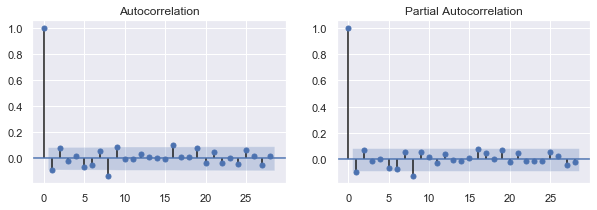

In [14]:
fig, ax = plt.subplots(1,2,figsize=(10,3))
sm.graphics.tsa.plot_acf(stocks['regn'], ax=ax[0])
sm.graphics.tsa.plot_pacf(stocks['regn'], ax=ax[1])
plt.show()

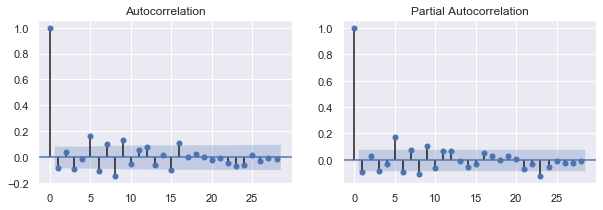

In [15]:
fig, ax = plt.subplots(1,2,figsize=(10,3))
sm.graphics.tsa.plot_acf(stocks['wst'], ax=ax[0])
sm.graphics.tsa.plot_pacf(stocks['wst'], ax=ax[1])
plt.show()

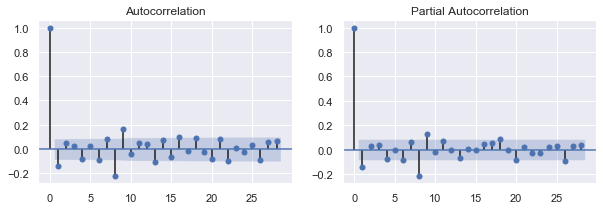

In [16]:
fig, ax = plt.subplots(1,2,figsize=(10,3))
sm.graphics.tsa.plot_acf(stocks['now'], ax=ax[0])
sm.graphics.tsa.plot_pacf(stocks['now'], ax=ax[1])
plt.show()

#### Comment 
There does not seem to be any autocorrelation or partial-autocorellation in the chosen stocks. 

### Correlation

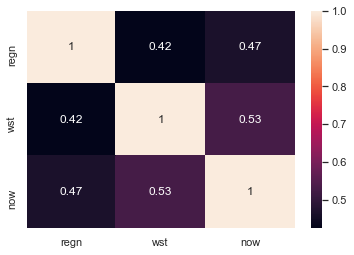

In [19]:
# calculate the correlation matrix
corr = stocks.corr()
# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

#### Comment
The unconditional correlation of the values displays only a small correlation between the stocks, at most it is equal to 0.53. 

## Question 2
Make bivariate scatterplots for the three pairs of assets.

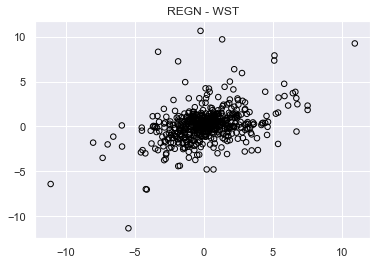

In [20]:
plt.scatter(stocks['regn'], stocks['wst'], s=30, facecolors='none', edgecolors='black')
plt.title('REGN - WST')
plt.show()

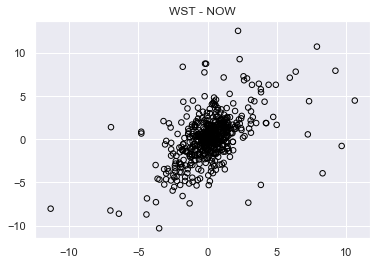

In [21]:
plt.scatter(stocks['wst'], stocks['now'], s=30, facecolors='none', edgecolors='black')
plt.title('WST - NOW')
plt.show()

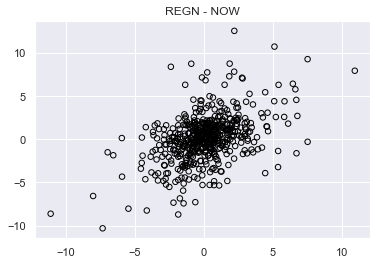

In [22]:
plt.scatter(stocks['regn'], stocks['now'], s=30, facecolors='none', edgecolors='black')
plt.title('REGN - NOW')
plt.show()

#### Comment: 
The correlation between the various stocks seems to be weak and positive. Given the typical values of logs returns, their high concentrations around 0 (i.e. small values) is typical. It is clear for all three shapes that some correlation exist (considering a loose cluster and a confidence ellipse). 

## Question 3
For each asset, estimate univariate GARCH models on the full sample with a normal innovation density.

In [40]:
from arch.univariate import arch_model
# GARCH model with normal innovation density
garchmodel_gaussian = arch_model(stocks['regn'], mean = 'Constant', vol='Garch', p=1, o=0, q=1, dist='normal')
model_fit = garchmodel_gaussian.fit()
print(model_fit.summary())
fig_regn_q3 = model_fit.conditional_volatility

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1139.8398401444908
Iteration:      2,   Func. Count:     15,   Neg. LLF: 1139.7394617892483
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1139.7202206260995
Iteration:      4,   Func. Count:     33,   Neg. LLF: 1139.707476182507
Iteration:      5,   Func. Count:     40,   Neg. LLF: 1139.5647276061832
Iteration:      6,   Func. Count:     47,   Neg. LLF: 1139.4446435474906
Iteration:      7,   Func. Count:     54,   Neg. LLF: 1139.3532241810744
Iteration:      8,   Func. Count:     61,   Neg. LLF: 1139.2766607857063
Iteration:      9,   Func. Count:     67,   Neg. LLF: 1139.2721269808799
Iteration:     10,   Func. Count:     73,   Neg. LLF: 1139.270336881365
Iteration:     11,   Func. Count:     79,   Neg. LLF: 1139.27031453197
Iteration:     12,   Func. Count:     85,   Neg. LLF: 1139.27031309535
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1139.2703130965092
            Iteratio

In [25]:
from arch.univariate import arch_model
# GARCH model with normal innovation density
garchmodel_gaussian = arch_model(stocks['wst'], mean = 'Constant', vol='Garch', p=1, o=0, q=1, dist='normal')
model_fit = garchmodel_gaussian.fit()
print(model_fit.summary())
fig_wst_q3 = model_fit.conditional_volatility

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1035.2147247185267
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1034.4068525097439
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1034.3430803875426
Iteration:      4,   Func. Count:     31,   Neg. LLF: 1033.9048383869501
Iteration:      5,   Func. Count:     38,   Neg. LLF: 1033.607010265755
Iteration:      6,   Func. Count:     45,   Neg. LLF: 1033.359137780118
Iteration:      7,   Func. Count:     52,   Neg. LLF: 1033.1875049787416
Iteration:      8,   Func. Count:     59,   Neg. LLF: 1033.0943815736623
Iteration:      9,   Func. Count:     66,   Neg. LLF: 1033.0407987017334
Iteration:     10,   Func. Count:     72,   Neg. LLF: 1033.0288988633097
Iteration:     11,   Func. Count:     78,   Neg. LLF: 1033.0256104228733
Iteration:     12,   Func. Count:     84,   Neg. LLF: 1033.025569749322
Iteration:     13,   Func. Count:     90,   Neg. LLF: 1033.0255574417913
Optimization terminated successfully.    (Exit mode 0)

In [33]:
from arch.univariate import arch_model
# GARCH model with normal innovation density
garchmodel_gaussian = arch_model(stocks['now'], mean = 'Constant', vol='Garch', p=3, o=0, q=0, dist='normal')
model_fit = garchmodel_gaussian.fit()
print(model_fit.summary())
fig_now_q3 = model_fit.conditional_volatility

Iteration:      1,   Func. Count:      7,   Neg. LLF: 1255.1298838385737
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1245.926538974876
Iteration:      3,   Func. Count:     25,   Neg. LLF: 1244.4204649198427
Iteration:      4,   Func. Count:     33,   Neg. LLF: 1240.3264436323102
Iteration:      5,   Func. Count:     41,   Neg. LLF: 1237.6246636594344
Iteration:      6,   Func. Count:     49,   Neg. LLF: 1236.6814582609127
Iteration:      7,   Func. Count:     57,   Neg. LLF: 1235.7673765008983
Iteration:      8,   Func. Count:     65,   Neg. LLF: 1235.1304798961935
Iteration:      9,   Func. Count:     73,   Neg. LLF: 1234.9740740192528
Iteration:     10,   Func. Count:     80,   Neg. LLF: 1234.957860865521
Iteration:     11,   Func. Count:     87,   Neg. LLF: 1234.9575759441036
Iteration:     12,   Func. Count:     94,   Neg. LLF: 1234.9575711423236
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1234.9575711421492
            Iter

#### Comment 
For all three stocks, we fit a univariate GARCH model with contant mean, and normal distribution of the errors (normal innovation densities). We choose a GARCH(1,1) for each and note that none of the coefficients are significant (p-value < 0.05) only the constants of the REGN and NOW stocks seem valid. Based on the autocorrelation and partial autocorrelation plots, the AR portion of the model should be set to 0. In this case, p, o and q refer to the lag order of the symmetric innovation, lag order of the asymmetric innovation and lag order of lagged volatility or equivalent respectively. 
Considering for example for the NOW stock, when setting q to 0, the p-value of the constant reduces massively (below 0.5). With this same parameter, we can increase the value of p for example. The p-value of the coefficient is significant from p = 3 or more but the coefficients are still small. 

## Question 4
Estimate a DCC model with univariate GARCH speciﬁcations for the variances.

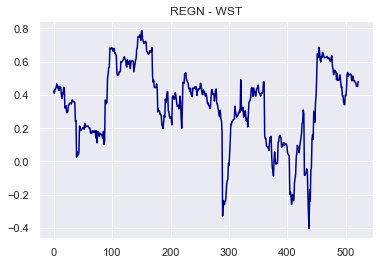

In [35]:
# EWMA in Python, as there is not a package for DCC
# subtract mean to the returns as we assume the returns model is a constant
regn = np.asarray(stocks['regn'] - stocks['regn'].mean())
wst = np.asarray(stocks['wst'] - stocks['wst'].mean())

mdata = np.zeros((stocks.shape[0], 2))
mdata[:,0] = regn
mdata[:,1] = wst

T = stocks.shape[0]
EWMA = np.full([T,3], np.nan)
variance_regn_wst = np.full([T,1], np.nan)
variance_wst_regn = np.full([T,1], np.nan)

# lambda can be changed to weight more the past variance or the past return
lmbda = 0.94
S = np.cov(mdata, rowvar = False)
EWMA[0,] = S.flatten()[[0,3,1]]

for i in range(1,T):
    S = lmbda * S + (1 - lmbda) * np.transpose(np.asmatrix(mdata[i-1]))* np.asmatrix(mdata[i-1])
    EWMA[i,] = [S[0,0], S[1,1], S[0,1]]
    variance_regn_wst[i,] = np.sqrt(S[0,0])
    variance_wst_regn[i,] = np.sqrt(S[1,1])
EWMArho_regn_wst = np.divide(EWMA[:,2], np.sqrt(np.multiply(EWMA[:,0],EWMA[:,1])))
plt.plot(EWMArho_regn_wst,color='darkblue')
plt.title('REGN - WST')
plt.show()

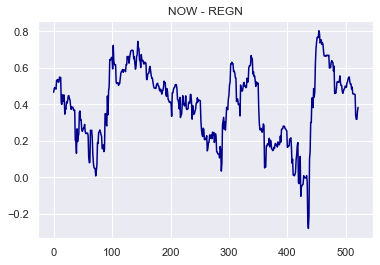

In [37]:
# EWMA in Python, as there is not a package for DCC
# subtract mean to the returns as we assume the returns model is a constant
regn = np.asarray(stocks['regn'] - stocks['regn'].mean())
now = np.asarray(stocks['now'] - stocks['now'].mean())

mdata = np.zeros((stocks.shape[0], 2))
mdata[:,0] = now
mdata[:,1] = regn

T = stocks.shape[0]
EWMA = np.full([T,3], np.nan)
variance_regn_now = np.full([T,1], np.nan)
variance_now_regn = np.full([T,1], np.nan)

# lambda can be changed to weight more the past variance or the past return
lmbda = 0.94
S = np.cov(mdata, rowvar = False)
EWMA[0,] = S.flatten()[[0,3,1]]

for i in range(1,T):
    S = lmbda * S + (1 - lmbda) * np.transpose(np.asmatrix(mdata[i-1]))* np.asmatrix(mdata[i-1])
    EWMA[i,] = [S[0,0], S[1,1], S[0,1]]
    variance_regn_now[i,] = np.sqrt(S[1,1])
    variance_now_regn[i,] = np.sqrt(S[0,0])
EWMArho_now_regn = np.divide(EWMA[:,2], np.sqrt(np.multiply(EWMA[:,0],EWMA[:,1])))
plt.plot(EWMArho_now_regn,color='darkblue')
plt.title('NOW - REGN')
plt.show()

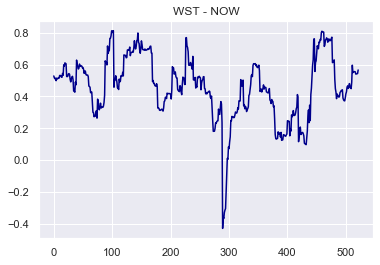

In [38]:
# EWMA in Python, as there is not a package for DCC
# subtract mean to the returns as we assume the returns model is a constant
now = np.asarray(stocks['now'] - stocks['now'].mean())
wst = np.asarray(stocks['wst'] - stocks['wst'].mean())

mdata = np.zeros((stocks.shape[0], 2))
mdata[:,0] = wst
mdata[:,1] = now

T = stocks.shape[0]
EWMA = np.full([T,3], np.nan)
variance_now_wst = np.full([T,1], np.nan)
variance_wst_now = np.full([T,1], np.nan)

# lambda can be changed to weight more the past variance or the past return
lmbda = 0.94
S = np.cov(mdata, rowvar = False)
EWMA[0,] = S.flatten()[[0,3,1]]

for i in range(1,T):
    S = lmbda * S + (1 - lmbda) * np.transpose(np.asmatrix(mdata[i-1]))* np.asmatrix(mdata[i-1])
    EWMA[i,] = [S[0,0], S[1,1], S[0,1]]
    variance_now_wst[i] = np.sqrt(S[1,1])
    variance_wst_now[i] = np.sqrt(S[0,0])
EWMArho_wst_now = np.divide(EWMA[:,2], np.sqrt(np.multiply(EWMA[:,0],EWMA[:,1])))
plt.plot(EWMArho_wst_now,color='darkblue')
plt.title('WST - NOW')
plt.show()

#### Comment
Python does not include a built in DCC model hence, following the instructions in the bivariate-GARCH.pynb file, we implement a EWMA model. The mean is substracted from the returns. The plots display the evolution of the correlation of the two variable studied over time. The EWMA model is a restricted integrated GARCH model (the intercept is set to 0). The smoothing parameter lambda is chosen as a rule of thumb as 0.94 for daily data. 

## Question 5 
Using plots, compare your univariate estimated variance series from the previous two questions.

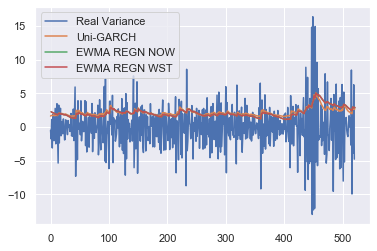

In [41]:
fig_regn_q3 = fig_regn_q3.reset_index()['cond_vol']
real = np.diff(stocks['regn'])
df = pd.DataFrame([real, fig_regn_q3, np.transpose(variance_regn_now)[0], np.transpose(variance_regn_wst)[0]]).transpose()
df.columns = ['Real Variance', 'Uni-GARCH', 'EWMA REGN NOW', 'EWMA REGN WST']
df.plot()

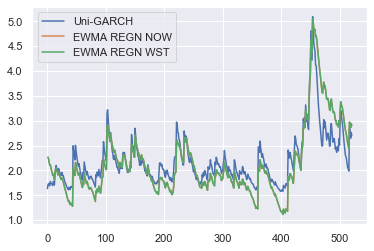

In [42]:
fig_regn_q3 = fig_regn_q3.reset_index()['cond_vol']
df = pd.DataFrame([fig_regn_q3, np.transpose(variance_regn_now)[0], np.transpose(variance_regn_wst)[0]]).transpose()
df.columns = ['Uni-GARCH', 'EWMA REGN NOW', 'EWMA REGN WST']
df.plot()

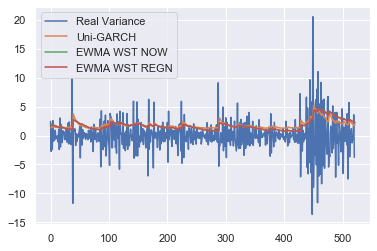

In [43]:
fig_regn_q3 = fig_wst_q3.reset_index()['cond_vol']
real = np.diff(stocks['wst'])
df = pd.DataFrame([real, fig_regn_q3, np.transpose(variance_wst_now)[0], np.transpose(variance_wst_regn)[0]]).transpose()
df.columns = ['Real Variance', 'Uni-GARCH', 'EWMA WST NOW', 'EWMA WST REGN']
df.plot()

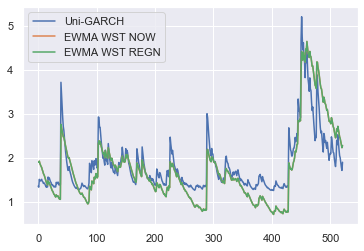

In [44]:
fig_regn_q3 = fig_wst_q3.reset_index()['cond_vol']
df = pd.DataFrame([fig_regn_q3, np.transpose(variance_wst_now)[0], np.transpose(variance_wst_regn)[0]]).transpose()
df.columns = ['Uni-GARCH', 'EWMA WST NOW', 'EWMA WST REGN']
df.plot()

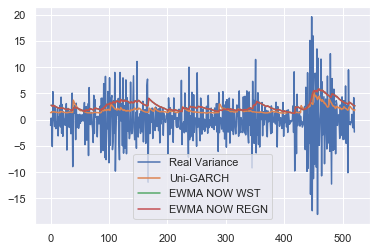

In [45]:
fig_regn_q3 = fig_wst_q3.reset_index()['cond_vol']
real = np.diff(stocks['now'])
df = pd.DataFrame([real, fig_regn_q3, np.transpose(variance_now_wst)[0], np.transpose(variance_now_regn)[0]]).transpose()
df.columns = ['Real Variance', 'Uni-GARCH', 'EWMA NOW WST', 'EWMA NOW REGN']
df.plot()

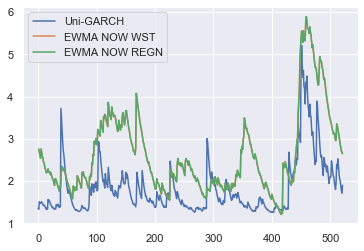

In [46]:
fig_regn_q3 = fig_wst_q3.reset_index()['cond_vol']
df = pd.DataFrame([fig_regn_q3, np.transpose(variance_now_wst)[0], np.transpose(variance_now_regn)[0]]).transpose()
df.columns = ['Uni-GARCH', 'EWMA NOW WST', 'EWMA NOW REGN']
df.plot()

#### Comment
The variance is computed as the difference between the log returns of a given day and the log returns of the day before. It is clear in all cases the data is very noisy. Both models are similar for the REGN and WST stocks. In both cases the EWMA model is slighly below the univariate GARCH and slightly smoother. The variances computed for the NOW stock vary a lot more from one another. The EWMA model is typically above the Univariate GARCH model. When comparing with the real variance, the Univariate GARCH seems to be a better approximation. This may be due to the smaller correlation of the NOW stock with both WST and REGN. 

## Question 6 
Make plots of the conditional correlation series. Interpret.

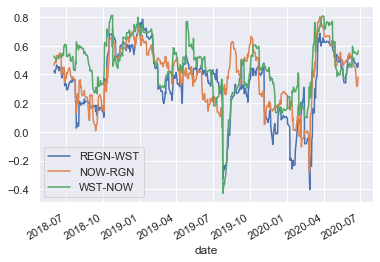

In [47]:
df = pd.DataFrame([EWMArho_regn_wst, EWMArho_now_regn, EWMArho_wst_now]).transpose()
df = df.set_index(stocks.reset_index()['date'])
df.columns = ['REGN-WST', 'NOW-RGN', 'WST-NOW']
df.plot()

#### Comment
The correlation plot above corresponds to the correlation computed between each couple of stocks over time. We expect a higher correlation towards the beginnong to middle of 2020, given the current events and since all firms benefited from the crisis, the correlation of their log-returns should be high. This is the case, especially in april where the correlations between all three stocks go up to 0.8. We would expect the pharmaceutical companies (REGN-WST) to have a higher correlation in general than with the workflow for companies firm (REGN-NOW, WST-NOW), it does not appear to be the case. Overall, the conditional correlations of the log returns of all three stocks seems to follow the same variations. 